## 利用pyart工具包对FMT标准格式雷达基数据进行速度退模糊

In [1]:
%matplotlib inline
import pyart
from metradar.io.decode_fmt_pyart import read_cnrad_fmt
import os
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:

filepath = '/mnt/e/metradar_test/dealias/'
filename = 'Z_RADR_I_Z9543_20250609112807_O_DOR_SAD_CAP_FMT.bin.bz2'

if not os.path.exists(filepath + '/' + filename):
    print('file not exist!')
else:
    radar = read_cnrad_fmt(filepath + '/' + filename)


In [3]:
print(radar.info())

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (5820,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (5820,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	velocity:
		data: <ndarray of type: float32 and shape: (5820, 1840)>
		units: meters_per_second
		standard_name: radial_velocity_of_scatterers_away_from_instrument
		long_name: Mean doppler Velocity
		valid_max: 95.0
		valid_min: -95.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	cross_co

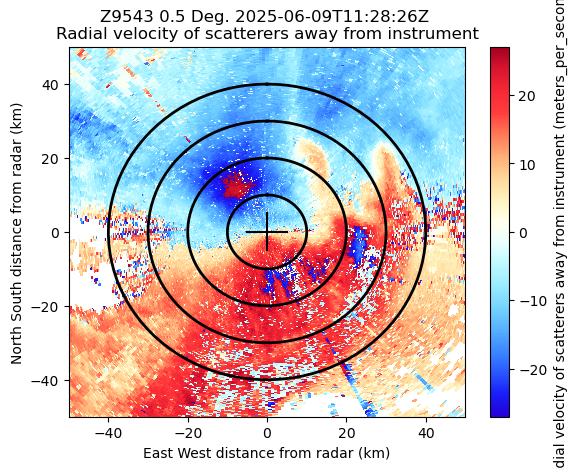

In [4]:
# 画ppi，最底层的径向速度
radar_display = pyart.graph.RadarDisplay(radar)

fig = plt.figure()
ax = fig.add_subplot(111)
radar_display.plot("velocity", 1, vmin=-27, vmax=27.0)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
radar_display.plot_range_rings([10, 20, 30, 40])
radar_display.plot_cross_hair(5.0)
plt.show()


## 退模糊处理

In [5]:
newvel = pyart.correct.dealias_region_based(radar, vel_field='velocity')
radar.add_field('corrected_velocity', newvel, replace_existing=True)


## 显示退模糊后的图

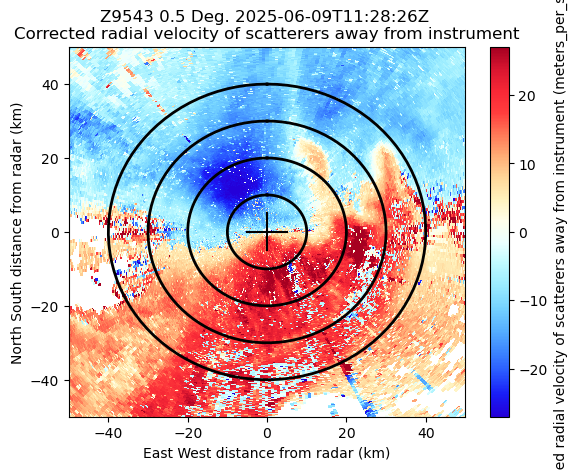

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
radar_display.plot("corrected_velocity", 1, vmin=-27, vmax=27.0)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
radar_display.plot_range_rings([10, 20, 30, 40])
radar_display.plot_cross_hair(5.0)
plt.show()